<a href="https://colab.research.google.com/github/chaurasia-aditya/CaptchaTheBots/blob/main/Resnet50_Noise_on_hcaptcha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from fastai.vision.all import *
import shutil
import os
!pip install py7zr
from py7zr import unpack_7zarchive
from PIL import Image as im
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
test_images.shape

(10000, 32, 32, 3)

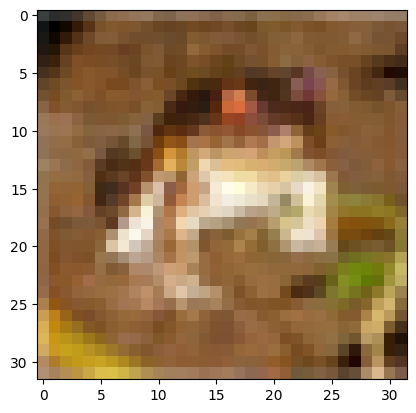

In [ ]:
plt.imshow(train_images[0])
plt.show()

In [ ]:
label_names = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck',
}

<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-5-bc99a1d9d01d>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is 0:


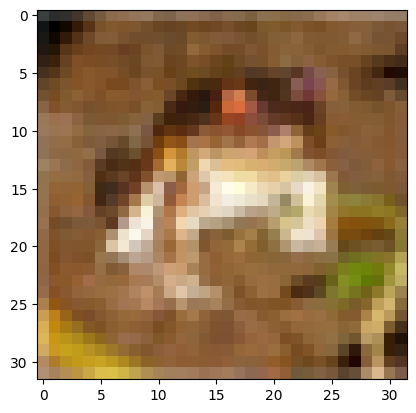

cifar10_dataset/train/frog/0.png


In [ ]:
import os
from tensorflow import keras
# Create directories for train and test sets
os.makedirs('cifar10_dataset/train', exist_ok=True)
os.makedirs('cifar10_dataset/test', exist_ok=True)

parent_path_train = "cifar10_dataset/train"
parent_path_valid = "cifar10_dataset/test"

# Organize train images into folders based on labels
for i in range(len(train_images)):
    label = label_names[train_labels[i][0]]
    os.makedirs(f'cifar10_dataset/train/{label}', exist_ok=True)
#     image_filename = f'cifar10_dataset/train/{label}/train_{i}.png'
    image_filename = f'cifar10_dataset/train/{label}/{i}.png'
    if i is 0:
        plt.imshow(train_images[i])
        plt.show()
        print(image_filename)
    keras.preprocessing.image.save_img(image_filename, train_images[i])

# Organize test images into folders based on labels
for i in range(len(test_images)):
    label = label_names[test_labels[i][0]]
    os.makedirs(f'cifar10_dataset/test/{label}', exist_ok=True)
#     image_filename = f'cifar10_dataset/test/{label}/test_{i}.png'
    image_filename = f'cifar10_dataset/test/{label}/{i}.png'
    keras.preprocessing.image.save_img(image_filename, test_images[i])

In [ ]:
!unzip hcaptcha-dataset-main.zip

In [ ]:
os.makedirs('./cifar10_dataset/test_captcha', exist_ok=True)

In [ ]:
!cp -R ./hcaptcha-dataset-main/airplane ./cifar10_dataset/test_captcha/
!cp -R ./hcaptcha-dataset-main/ship ./cifar10_dataset/test_captcha/
!cp -R ./hcaptcha-dataset-main/truck ./cifar10_dataset/test_captcha/
!mv ./cifar10_dataset/test_captcha/ship ./cifar10_dataset/test_captcha/boat

In [ ]:
!cp -R ./hcaptcha-dataset-main/boat ./cifar10_dataset/test_captcha/
!mv ./cifar10_dataset/test_captcha/boat ./cifar10_dataset/test_captcha/ship

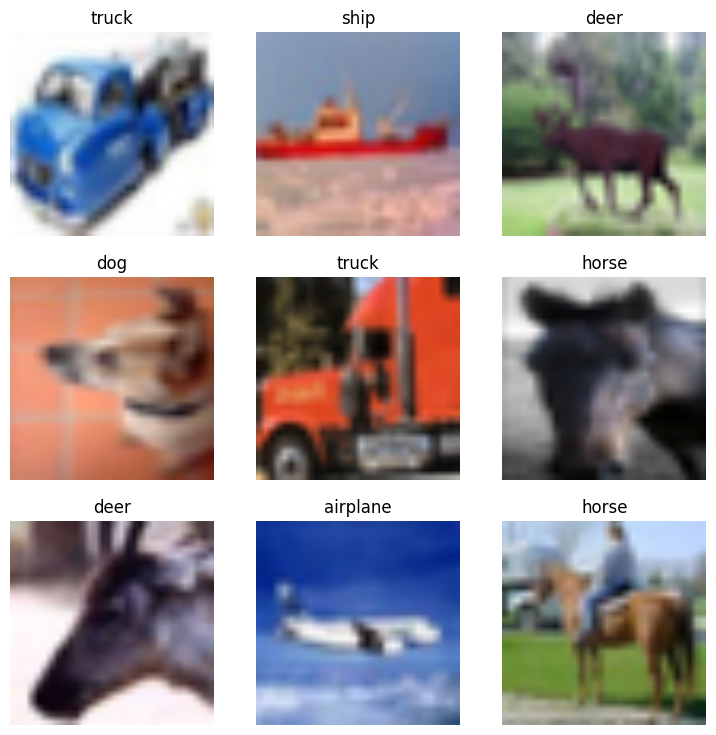

In [ ]:
dls = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test", item_tfms=Resize(224), bs=64)

dls.show_batch()

In [ ]:
# Training the model with resnet50 and MixUp
learn = vision_learner(dls, resnet50, metrics=accuracy, cbs=MixUp())
learn.load("./Resnet50_96.14")

In [ ]:
# Validate the model on the validation set and print accuracy
loss, accuracy_val = learn.validate()
print(f"Validation accuracy: {accuracy_val*100:.2f}%")

Validation accuracy: 96.14%


# captcha

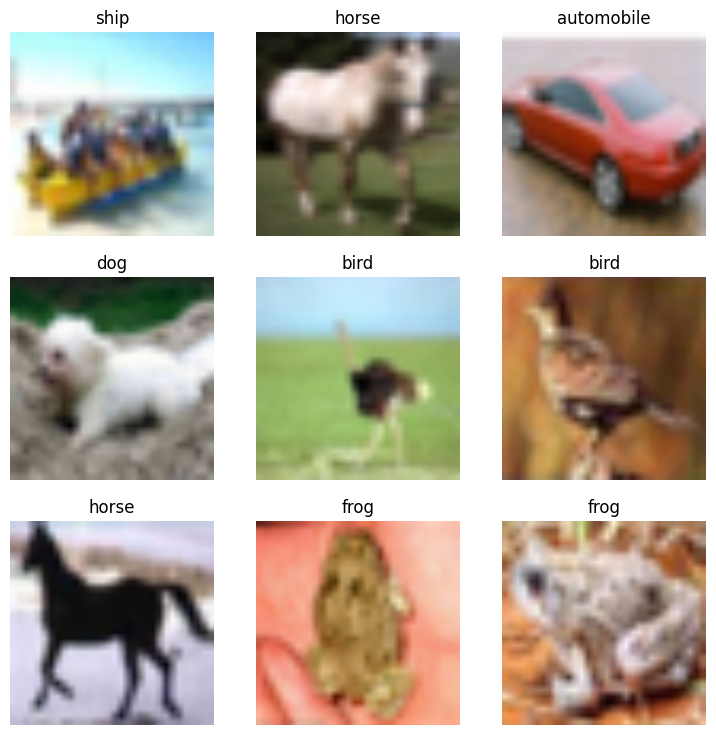

In [ ]:
dls2 = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test_captcha", item_tfms=Resize(224), bs=64)

dls2.show_batch()

In [ ]:
# Training the model with resnet50 and MixUp
learn2 = vision_learner(dls2, resnet50, metrics=accuracy, cbs=MixUp())
learn2.load("./Resnet50_96.14")

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [ ]:
# Validate the model on the validation set and print accuracy
loss, accuracy_val = learn2.validate()
print(f"Validation accuracy: {accuracy_val*100:.2f}%")

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


Validation accuracy: 99.90%


# S&P

In [ ]:
from skimage.util import random_noise

In [ ]:
noise_factor = 0.01

In [ ]:
base_captcha = "./cifar10_dataset/test_captcha"

In [ ]:
label_id = {
    'airplane':0,
    'ship':8,
    'truck':9,
}

In [ ]:
image_data = []
label_data = []
for folder_name in os.listdir(base_captcha):
    folder_path = os.path.join(base_captcha, folder_name)
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Loop through each image in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                image_path = os.path.join(folder_path, filename)

                img = Image.open(image_path)
                img = img.resize((224,224), Image.ANTIALIAS)
                img_array = np.array(img)
                img_array = img_array.astype(np.float32) / 255.0
                # print(img_array.shape)
                # Append the image array to the list
                image_data.append(img_array)
                label_data.append(label_id[folder_name])

# Convert the list to a NumPy array
test_hcaptcha_base = np.array(image_data)
test_hcaptcha_labels = np.array(label_data)

<ipython-input-6-94eb78bb8284>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224,224), Image.ANTIALIAS)


In [ ]:
test_hcaptcha_base.shape

(1984, 224, 224, 3)

In [ ]:
unique_numbers, counts = np.unique(test_hcaptcha_labels, return_counts=True)

# Display the results
for number, count in zip(unique_numbers, counts):
    print(f"Number {number}: Count {count}")

Number 0: Count 503
Number 8: Count 662
Number 9: Count 819


In [ ]:
test_hcaptcha_labels.resize(test_hcaptcha_labels.shape[0],1)

In [ ]:
test_images_sp = random_noise(test_hcaptcha_base, mode="s&p",clip=True, amount=noise_factor)

In [ ]:
os.makedirs('./cifar10_dataset/test_captcha_sp2', exist_ok=True)
for i in range(len(test_hcaptcha_base)):
    label = label_names[test_hcaptcha_labels[i][0]]
    os.makedirs(f'./cifar10_dataset/test_captcha_sp2/{label}', exist_ok=True)
#     image_filename = f'cifar10_dataset/test/{label}/test_{i}.png'
    image_filename = f'./cifar10_dataset/test_captcha_sp2/{label}/{i}.png'
    # noisy_img = add_sp(test_images[i])
    # if i == 0:
    #   plt.imshow(noisy_img/255.0)
    #   plt.show()
    #   # print(noisy_img[1])
    keras.preprocessing.image.save_img(image_filename, test_images_sp[i])

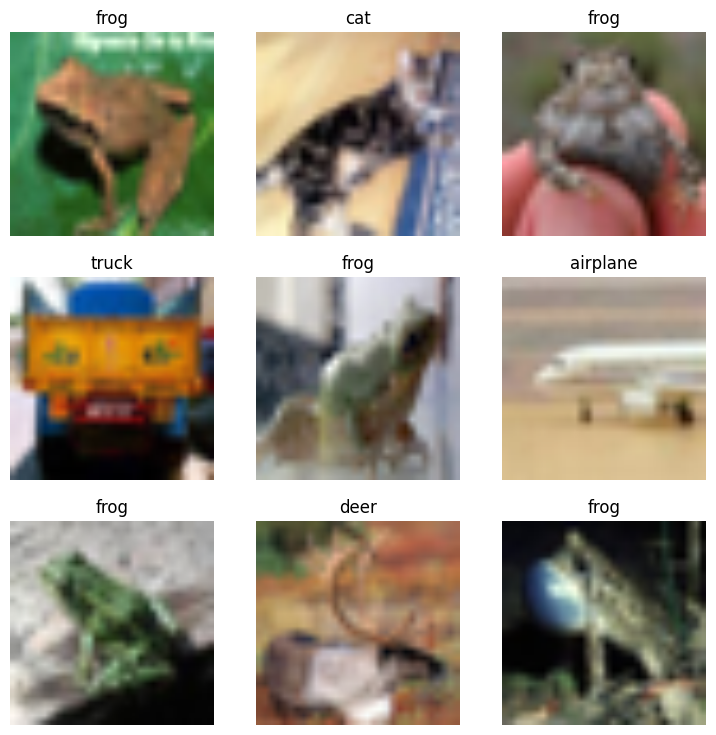

In [ ]:
dls3 = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test_captcha_sp2", item_tfms=Resize(224), bs=64)
dls3.show_batch()

In [ ]:
# Training the model with resnet101 and MixUp
learn3 = vision_learner(dls3, resnet50, metrics=accuracy, cbs=MixUp())
learn3.load("./Resnet50_96.14")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 63.4MB/s]


In [ ]:
loss, accuracy_val = learn3.validate()
print(f"Validation accuracy: {accuracy_val*100:.2f}%")

Validation accuracy: 89.87%


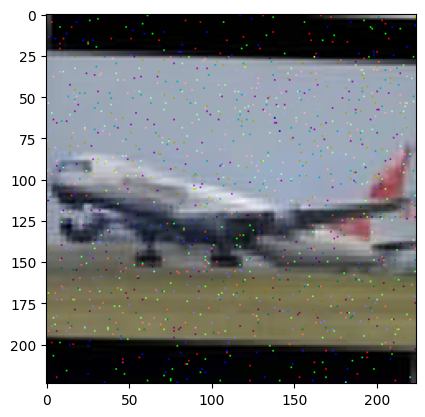

In [ ]:
plt.imshow(test_images_sp[0])
plt.show()

# Gaussian

In [ ]:
test_images_g = random_noise(test_hcaptcha_base, mode="gaussian",clip=True)

In [ ]:
os.makedirs('./cifar10_dataset/test_g2', exist_ok=True)
for i in range(len(test_hcaptcha_base)):
    label = label_names[test_hcaptcha_labels[i][0]]
    os.makedirs(f'./cifar10_dataset/test_g2/{label}', exist_ok=True)
    image_filename = f'./cifar10_dataset/test_g2/{label}/{i}.png'
    keras.preprocessing.image.save_img(image_filename, test_images_g[i])

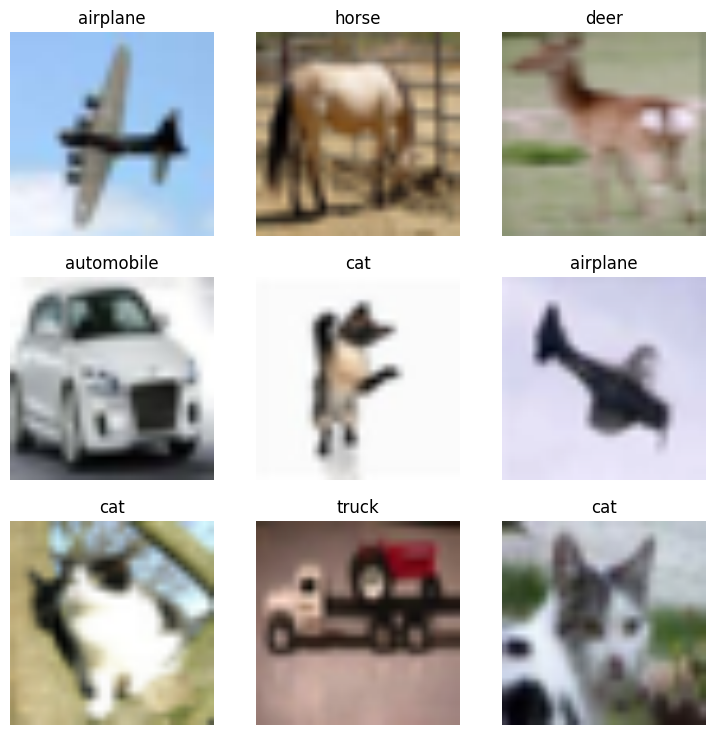

In [ ]:
dls4 = ImageDataLoaders.from_folder(path="./cifar10_dataset", train="train", valid="test_g2", item_tfms=Resize(224), bs=64)
dls4.show_batch()

In [ ]:
# Training the model with resnet101 and MixUp
learn4 = vision_learner(dls4, resnet50, metrics=accuracy, cbs=MixUp())
learn4.load("./Resnet50_96.14")

In [ ]:
loss, accuracy_val = learn4.validate()
print(f"Validation accuracy: {accuracy_val*100:.2f}%")

Validation accuracy: 51.41%


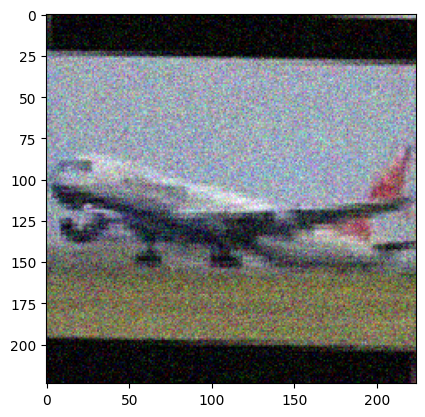

In [ ]:
plt.imshow(test_images_g[0])
plt.show()